In [1]:
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"
os.environ['PATH'] = f"{os.environ['PATH']}:/opt/conda/lib/python3.6/site-packages"

In [2]:
# Imports here
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import torch
import numpy as np
from torch import nn
from torch import optim
from torchvision import datasets, models, transforms
import torch.nn.functional as F
import torch.utils.data
import pandas as pd
#import helper
from collections import OrderedDict
from PIL import Image
import seaborn as sns

In [3]:
data_dir = '/content/udacity-image-classification/flowers'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'
test_dir = data_dir + '/test'

In [4]:
# TODO: Define your transforms for the training, validation, and testing sets
train_data_transforms = transforms.Compose ([transforms.RandomRotation (30),
                                             transforms.RandomResizedCrop (224),
                                             transforms.RandomHorizontalFlip (),
                                             transforms.ToTensor (),
                                             transforms.Normalize ([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
                                            ])

valid_data_transforms = transforms.Compose ([transforms.Resize (255),
                                             transforms.CenterCrop (224),
                                             transforms.ToTensor (),
                                             transforms.Normalize ([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
                                            ])

test_data_transforms = transforms.Compose ([transforms.Resize (255),
                                             transforms.CenterCrop (224),
                                             transforms.ToTensor (),
                                             transforms.Normalize ([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
                                            ])

In [5]:
# TODO: Load the datasets with ImageFolder
train_image_datasets = datasets.ImageFolder (train_dir, transform = train_data_transforms)
valid_image_datasets = datasets.ImageFolder (valid_dir, transform = valid_data_transforms)
test_image_datasets = datasets.ImageFolder (test_dir, transform = test_data_transforms)

In [6]:
# TODO: Using the image datasets and the trainforms, define the dataloaders
train_loader = torch.utils.data.DataLoader(train_image_datasets, batch_size = 64, shuffle = True)
valid_loader = torch.utils.data.DataLoader(valid_image_datasets, batch_size = 64, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_image_datasets, batch_size = 64, shuffle = True)

In [7]:
inputs, labels = next(iter(train_loader))
inputs [0,:]
inputs.size ()

torch.Size([64, 3, 224, 224])

In [8]:
train_image_datasets.class_to_idx

{'1': 0,
 '10': 1,
 '100': 2,
 '101': 3,
 '102': 4,
 '11': 5,
 '12': 6,
 '13': 7,
 '14': 8,
 '15': 9,
 '16': 10,
 '17': 11,
 '18': 12,
 '19': 13,
 '2': 14,
 '20': 15,
 '21': 16,
 '22': 17,
 '23': 18,
 '24': 19,
 '25': 20,
 '26': 21,
 '27': 22,
 '28': 23,
 '29': 24,
 '3': 25,
 '30': 26,
 '31': 27,
 '32': 28,
 '33': 29,
 '34': 30,
 '35': 31,
 '36': 32,
 '37': 33,
 '38': 34,
 '39': 35,
 '4': 36,
 '40': 37,
 '41': 38,
 '42': 39,
 '43': 40,
 '44': 41,
 '45': 42,
 '46': 43,
 '47': 44,
 '48': 45,
 '49': 46,
 '5': 47,
 '50': 48,
 '51': 49,
 '52': 50,
 '53': 51,
 '54': 52,
 '55': 53,
 '56': 54,
 '57': 55,
 '58': 56,
 '59': 57,
 '6': 58,
 '60': 59,
 '61': 60,
 '62': 61,
 '63': 62,
 '64': 63,
 '65': 64,
 '66': 65,
 '67': 66,
 '68': 67,
 '69': 68,
 '7': 69,
 '70': 70,
 '71': 71,
 '72': 72,
 '73': 73,
 '74': 74,
 '75': 75,
 '76': 76,
 '77': 77,
 '78': 78,
 '79': 79,
 '8': 80,
 '80': 81,
 '81': 82,
 '82': 83,
 '83': 84,
 '84': 85,
 '85': 86,
 '86': 87,
 '87': 88,
 '88': 89,
 '89': 90,
 '9': 91,
 '90

In [9]:
import json

with open(r'/content/udacity-image-classification/cat_to_name.json') as f:
    cat_to_name = json.load(f)

len (cat_to_name)
cat_to_name

{'21': 'fire lily',
 '3': 'canterbury bells',
 '45': 'bolero deep blue',
 '1': 'pink primrose',
 '34': 'mexican aster',
 '27': 'prince of wales feathers',
 '7': 'moon orchid',
 '16': 'globe-flower',
 '25': 'grape hyacinth',
 '26': 'corn poppy',
 '79': 'toad lily',
 '39': 'siam tulip',
 '24': 'red ginger',
 '67': 'spring crocus',
 '35': 'alpine sea holly',
 '32': 'garden phlox',
 '10': 'globe thistle',
 '6': 'tiger lily',
 '93': 'ball moss',
 '33': 'love in the mist',
 '9': 'monkshood',
 '102': 'blackberry lily',
 '14': 'spear thistle',
 '19': 'balloon flower',
 '100': 'blanket flower',
 '13': 'king protea',
 '49': 'oxeye daisy',
 '15': 'yellow iris',
 '61': 'cautleya spicata',
 '31': 'carnation',
 '64': 'silverbush',
 '68': 'bearded iris',
 '63': 'black-eyed susan',
 '69': 'windflower',
 '62': 'japanese anemone',
 '20': 'giant white arum lily',
 '38': 'great masterwort',
 '4': 'sweet pea',
 '86': 'tree mallow',
 '101': 'trumpet creeper',
 '42': 'daffodil',
 '22': 'pincushion flower',
 

In [10]:
model = models.alexnet (pretrained = True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [11]:
# updating classifer in the network
for param in model.parameters():
    param.requires_grad = False

classifier = nn.Sequential  (OrderedDict ([
                            ('fc1', nn.Linear (9216, 4096)),
                            ('relu1', nn.ReLU ()),
                            ('dropout1', nn.Dropout (p = 0.3)),
                            ('fc2', nn.Linear (4096, 2048)),
                            ('relu2', nn.ReLU ()),
                            ('dropout2', nn.Dropout (p = 0.3)),
                            ('fc3', nn.Linear (2048, 102)),
                            ('output', nn.LogSoftmax (dim =1))
                            ]))
model.classifier = classifier
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (fc1): Linear(in_features=9216, out_features=4096, bias=True)
    (relu1): ReLU()
    (dropout1): Dr

In [12]:
#initializing criterion and optimizer
criterion = nn.NLLLoss ()
optimizer = optim.Adam (model.classifier.parameters (), lr = 0.001)

In [21]:
# Defining validation
def validation(model, valid_loader, criterion):
    model.to ('cpu')

    valid_loss = 0
    accuracy = 0
    for inputs, labels in valid_loader:

        inputs, labels = inputs.to('cpu'), labels.to('cpu')
        output = model.forward(inputs)
        valid_loss += criterion(output, labels).item()

        ps = torch.exp(output)
        equality = (labels.data == ps.max(dim=1)[1])
        accuracy += equality.type(torch.FloatTensor).mean()

    return valid_loss, accuracy



In [15]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [16]:
!shutdown -r now

System has not been booted with systemd as init system (PID 1). Can't operate.
Failed to connect to bus: Host is down
Failed to talk to init daemon.


In [22]:
epochs = 7
print_every = 40
steps = 0
device = 'cpu'
for e in range (epochs):
    running_loss = 0
    for ii, (inputs, labels) in enumerate (train_loader):
        steps += 1

        inputs, labels = inputs.to(device), labels.to(device)
        #inputs, labels = inputs.to('cuda'), labels.to('cuda')

        optimizer.zero_grad () 

        # Forward and backward passes
        outputs = model.forward (inputs) # output
        loss = criterion (outputs, labels) #loss
        loss.backward ()
        optimizer.step () 
        running_loss += loss.item () 

        if steps % print_every == 0:
            model.eval () 

            # Turn off gradients for validation, saves memory and computations
            with torch.no_grad():
                valid_loss, accuracy = validation(model, valid_loader, criterion)

            print("Epoch: {}/{}.. ".format(e+1, epochs),
                  "Training Loss: {:.3f}.. ".format(running_loss/print_every),
                  "Valid Loss: {:.3f}.. ".format(valid_loss/len(valid_loader)),
                  "Valid Accuracy: {:.3f}%".format(accuracy/len(valid_loader)*100))

            running_loss = 0

            # Make sure training is back on
            model.train()

Epoch: 1/7..  Training Loss: 1.593..  Valid Loss: 1.217..  Valid Accuracy: 66.889%
Epoch: 1/7..  Training Loss: 1.847..  Valid Loss: 1.052..  Valid Accuracy: 72.139%
Epoch: 2/7..  Training Loss: 0.661..  Valid Loss: 0.928..  Valid Accuracy: 74.889%
Epoch: 2/7..  Training Loss: 1.651..  Valid Loss: 0.903..  Valid Accuracy: 75.611%
Epoch: 2/7..  Training Loss: 1.551..  Valid Loss: 0.844..  Valid Accuracy: 76.293%
Epoch: 3/7..  Training Loss: 1.254..  Valid Loss: 0.849..  Valid Accuracy: 75.692%
Epoch: 3/7..  Training Loss: 1.433..  Valid Loss: 0.779..  Valid Accuracy: 77.087%
Epoch: 4/7..  Training Loss: 0.407..  Valid Loss: 0.734..  Valid Accuracy: 78.889%
Epoch: 4/7..  Training Loss: 1.309..  Valid Loss: 0.754..  Valid Accuracy: 78.803%
Epoch: 4/7..  Training Loss: 1.425..  Valid Loss: 0.767..  Valid Accuracy: 77.067%
Epoch: 5/7..  Training Loss: 0.899..  Valid Loss: 0.689..  Valid Accuracy: 81.221%
Epoch: 5/7..  Training Loss: 1.305..  Valid Loss: 0.702..  Valid Accuracy: 80.793%
Epoc

In [15]:
!nvidia-smi -L

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [20]:
!sudo apt-get update
!sudo apt-get install nvidia-driver-470

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [1,827 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,738 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/univers

In [22]:
pip install torch==1.12.1+cu113 torchvision==0.13.1+cu113 torchaudio==0.12.1 -f https://download.pytorch.org/whl/cu113/torch_stable.html


Looking in links: https://download.pytorch.org/whl/cu113/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 GB 585.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 84.3 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.1.2+cu121
    Uninstalling torch-2.1.2+cu121:
      Successfully uninstalled torch-2.1.2+cu121
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.16.2+cu121
    Uninstalling torchvision-0.16.2+cu121:
      Successfully uninstalled torchvision-0.16.2+cu121
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 2.1.2+cu121
    Uninstalling torchaudio-2.1.2+cu121:
      Successfully uninstalled torchaudio-2.1.2+cu121
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of t

In [24]:
ts_correct = 0
ts_total = 0

with torch.no_grad ():
    for data in test_loader:
        inputs, labels = data
        inputs, labels = inputs.to('cpu'), labels.to('cpu')
        outputs = model (inputs)
        _, predicted = torch.max (outputs.data,1)
        ts_total += labels.size (0)
        ts_correct += (predicted == labels).sum().item()

print('Accuracy of the network on test images: %d %%' % (100 * ts_correct / ts_total))
ts_total

Accuracy of the network on test images: 71 %


819

In [25]:
model.state_dict ()

OrderedDict([('features.0.weight',
              tensor([[[[ 1.1864e-01,  9.4069e-02,  9.5435e-02,  ...,  5.5822e-02,
                          2.1575e-02,  4.9963e-02],
                        [ 7.4882e-02,  3.8940e-02,  5.2979e-02,  ...,  2.5709e-02,
                         -1.1299e-02,  4.1590e-03],
                        [ 7.5425e-02,  3.8779e-02,  5.4930e-02,  ...,  4.3596e-02,
                          1.0225e-02,  1.3251e-02],
                        ...,
                        [ 9.3155e-02,  1.0374e-01,  6.7547e-02,  ..., -2.0277e-01,
                         -1.2839e-01, -1.1220e-01],
                        [ 4.3544e-02,  6.4916e-02,  3.6164e-02,  ..., -2.0248e-01,
                         -1.1376e-01, -1.0719e-01],
                        [ 4.7369e-02,  6.2543e-02,  2.4758e-02,  ..., -1.1844e-01,
                         -9.5567e-02, -8.3890e-02]],
              
                       [[-7.2634e-02, -5.7996e-02, -8.0661e-02,  ..., -6.0304e-04,
                         -2

Save the checkpoint

In [26]:
model.to ('cpu') #no need to use cuda for saving/loading model.
# TODO: Save the checkpoint
model.class_to_idx = train_image_datasets.class_to_idx 

#creating dictionary
checkpoint = {'classifier': model.classifier,
              'state_dict': model.state_dict (),
              'mapping':    model.class_to_idx
             }

torch.save (checkpoint, 'project_checkpoint.pth')

In [27]:
# TODO: Write a function that loads a checkpoint and rebuilds the model

def loading_model (file_path):
    checkpoint = torch.load (file_path) 
    model = models.alexnet (pretrained = True) 

    model.classifier = checkpoint ['classifier']
    model.load_state_dict (checkpoint ['state_dict'])
    model.class_to_idx = checkpoint ['mapping']

    for param in model.parameters():
        param.requires_grad = False 

    return model

In [28]:
model_verify = loading_model ('project_checkpoint.pth')
model_verify

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (fc1): Linear(in_features=9216, out_features=4096, bias=True)
    (relu1): ReLU()
    (dropout1): Dr

In [29]:
def process_image(image):
    ''' Scales, crops, and normalizes a PIL image for a PyTorch model,
        returns an Numpy array
    '''
    #size = 256, 256
    im = Image.open (image) 
    width, height = im.size 
    

    if width > height:
        height = 256
        im.thumbnail ((50000, height), Image.ANTIALIAS)
    else:
        width = 256
        im.thumbnail ((width,50000), Image.ANTIALIAS)


    width, height = im.size
    reduce = 224
    left = (width - reduce)/2
    top = (height - reduce)/2
    right = left + 224
    bottom = top + 224
    im = im.crop ((left, top, right, bottom))

    
    np_image = np.array (im)/255 
    np_image -= np.array ([0.485, 0.456, 0.406])
    np_image /= np.array ([0.229, 0.224, 0.225])

    np_image= np_image.transpose ((2,0,1))

    return np_image


<ipython-input-29-b4af56b37dbb>:12: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  im.thumbnail ((50000, height), Image.ANTIALIAS)


<Axes: >

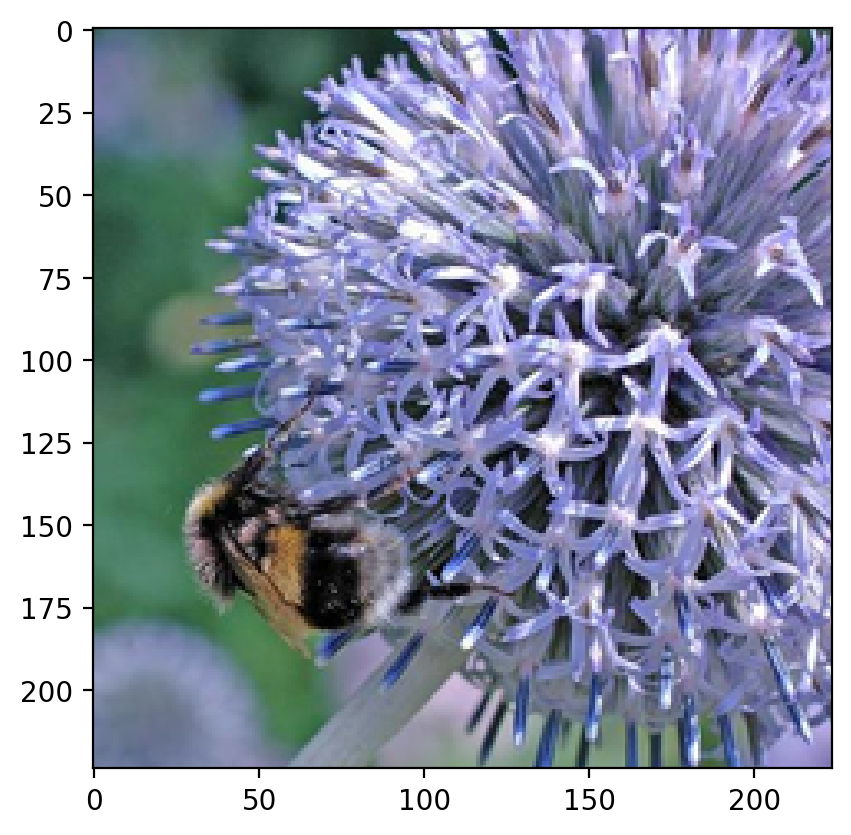

In [31]:
def imshow(image, ax=None, title=None):
    if ax is None:
        fig, ax = plt.subplots()

    
    image = np.array (image)
    image = image.transpose((1, 2, 0))

 
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
  

    # Image needs to be clipped 
    image = np.clip(image, 0, 1)

    ax.imshow(image)

    return ax

image_path = '/content/udacity-image-classification/flowers/train/10/image_07091.jpg'
img = process_image(image_path)
#img.shape
imshow(img)

Class Prediction

In [32]:


def predict(image_path, model, topkl):
    ''' Predict the class (or classes) of an image using a trained deep learning model.
    '''
    
    image = process_image (image_path) 

    
    im = torch.from_numpy (image).type (torch.FloatTensor)

    im = im.unsqueeze (dim = 0) 
    with torch.no_grad ():
        output = model.forward (im)
    output_prob = torch.exp (output) #converting probability

    probs, indeces = output_prob.topk (topkl)
    probs = probs.numpy () #converting numpy array
    indeces = indeces.numpy ()

    probs = probs.tolist () [0] #converting list
    indeces = indeces.tolist () [0]


    mapping = {val: key for key, val in
                model.class_to_idx.items()
                }

    classes = [mapping [item] for item in indeces]

    classes = np.array (classes) 

    return probs, classes


<ipython-input-29-b4af56b37dbb>:12: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  im.thumbnail ((50000, height), Image.ANTIALIAS)


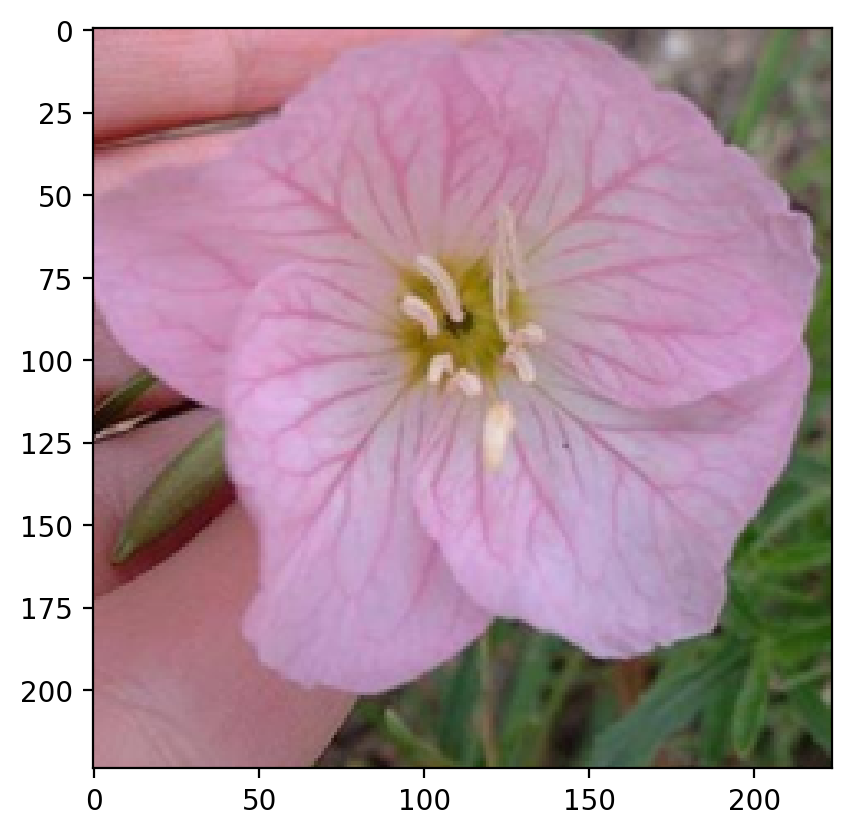

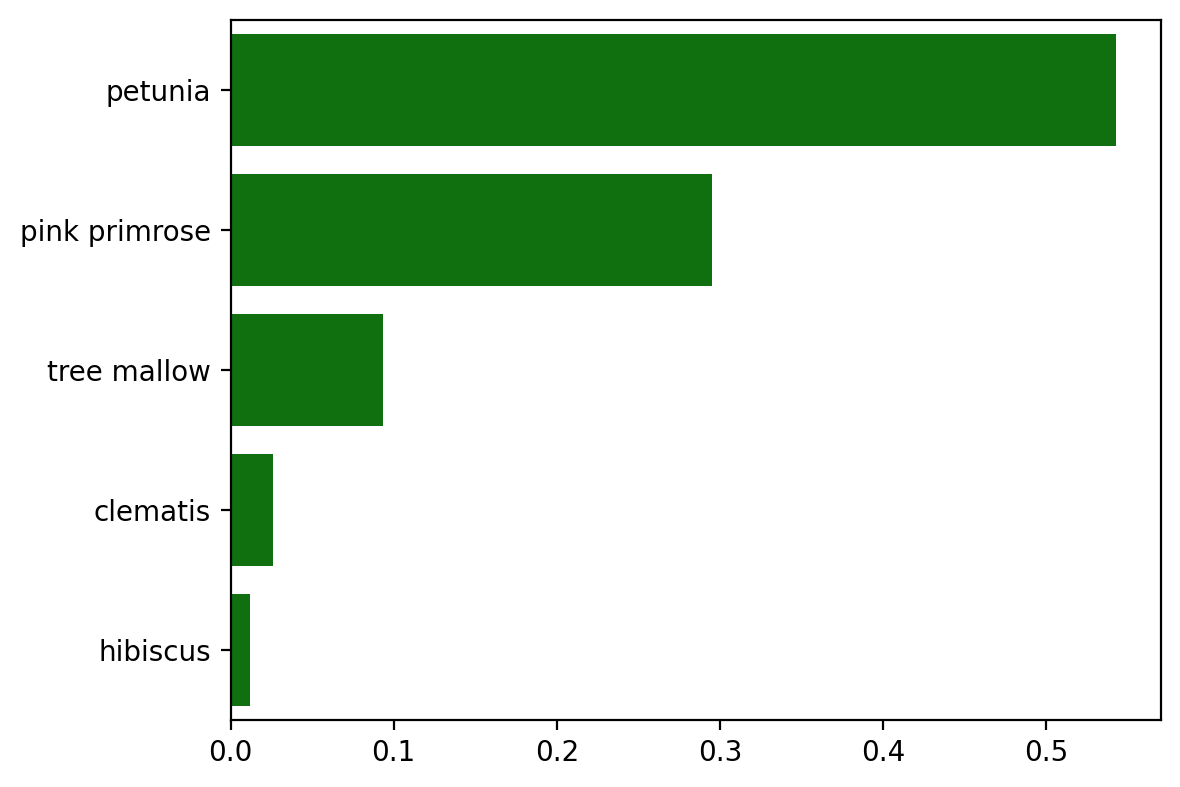

In [36]:

model = model_verify 
file_path = '//content/udacity-image-classification/flowers/test/1/image_06754.jpg' #an example from test set

img = process_image (file_path)
imshow (img)
plt.show()
probs, classes = predict (file_path, model, 5)



class_names = [cat_to_name [item] for item in classes]


plt.figure(figsize = (6,10))
plt.subplot(2,1,2)


sns.barplot(x=probs, y=class_names, color= 'green');


plt.show()

In [37]:
from google.colab import files

# Download the file
files.download('/content/project_checkpoint.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>